# **Hazardous Asteroid Prediction**

- Asteroids are rocky objects orbiting the Sun, with some coming close to Earth. Potentially Hazardous Asteroids (PHAs) are those pose a threat to earth.
- In this classification project, we will use the Asteroid Dataset to predict whether an asteroid is hazardous or not.
- By analyzing features such as orbital parameters, size, and brightness, we can train a machine learning model to classify asteroids as PHAs or non-PHAs.
- The goal is to contribute to planetary defense by identifying potential threats early and assisting scientists in tracking hazardous asteroids more effectively.

Dataset : Asteroid Dataset

### Some Features in Dataset

- **SPK-ID:** Object primary SPK-ID
- **Object ID**: Object internal database ID
- **Object fullname:** Object full name/designation
- **pdes**: Object primary designation
- **name:** Object IAU name
- **NEO:** Near-Earth Object (NEO) flag
- **PHA:** Potentially Hazardous Asteroid (PHA) flag
- **H:** Absolute magnitude parameter
- Diameter: object diameter (from equivalent sphere) km Unit
- **Albedo:** Geometric albedo
- **Diameter_sigma:** 1-sigma uncertainty in object diameter km Unit
- **Orbit_id:** Orbit solution ID
- **Epoch:** Epoch of osculation in modified Julian day form
- **Equinox:** Equinox of reference frame
- **e:** Eccentricity
- **a:** Semi-major axis au Unit
- **q:** perihelion distance au Unit
- **i:** inclination; angle with respect to x-y ecliptic plane
- **tp:** Time of perihelion passage TDB Unit
- **moid_ld:** Earth Minimum Orbit Intersection Distance au Unit

**Importing all necessary Libraries**

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

**Connecting Dataset using Kaggle API**

In [ ]:
!pip install kaggle==1.5.12

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [4]:
!kaggle datasets download -d sakhawat18/asteroid-dataset

 96% 175M/182M [00:01<00:00, 134MB/s]
100% 182M/182M [00:01<00:00, 125MB/s]


In [5]:
!unzip /content/asteroid-dataset.zip

Archive:  /content/asteroid-dataset.zip
  inflating: dataset.csv             


**Importing Dataset**

In [6]:
import pandas as pd
df=pd.read_csv("/content/dataset.csv")

<ipython-input-6-8a7c2b9c5612>:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/dataset.csv")


In [7]:
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [8]:
df.shape  # rows and columns

(958524, 45)

In [9]:
df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [10]:
df.dtypes

,0
id,object
spkid,int64
full_name,object
pdes,object
name,object
prefix,object
neo,object
pha,object
H,float64
diameter,float64


In [11]:
df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [12]:
df.isna().sum()

,0
id,0
spkid,0
full_name,0
pdes,0
name,936460
prefix,958506
neo,4
pha,19921
H,6263
diameter,822315


### Analysing Categorical values

In [13]:
df.pha.value_counts()

,count
pha,
N,936537
Y,2066


- pha (Pottentially Hazardous Asteroid) is the depended variable here.
- It is a highlt imbalanced dataset

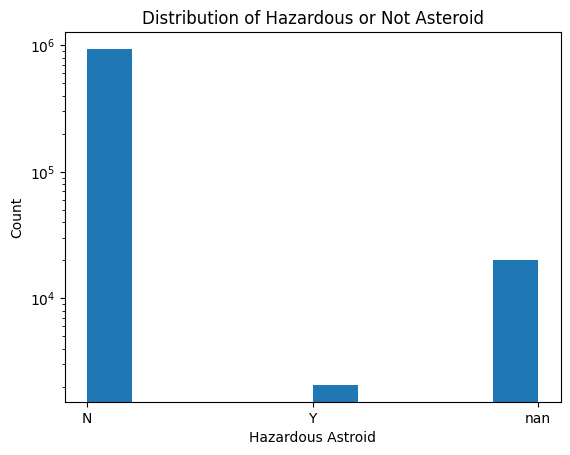

In [14]:
plt.hist(df.pha.astype(str))
plt.yscale('log')
plt.xlabel('Hazardous Astroid')
plt.ylabel('Count')
plt.title("Distribution of Hazardous or Not Asteroid")
plt.show()

Null values also present in pha column that should be droped

In [ ]:
# converting Categorical to numerical variables

df.pha.replace(['N','Y'],[0,1],inplace=True)

In [16]:
# Nearest Earth

df.neo.value_counts()

,count
neo,
N,935625
Y,22895


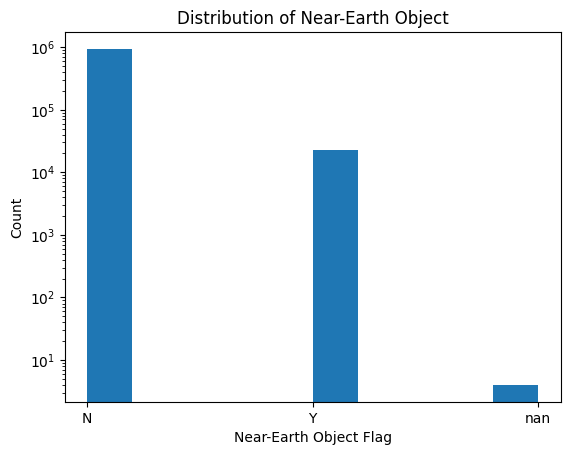

In [17]:
plt.hist(df.neo.astype(str))
plt.yscale('log')
plt.xlabel('Near-Earth Object Flag')
plt.ylabel('Count')
plt.title("Distribution of Near-Earth Object")
plt.show()

In [18]:
# Count of each class of Astroid

df['class'].value_counts()

,count
class,
MBA,855954
OMB,28355
IMB,20360
MCA,18685
APO,12687
AMO,8457
TJN,8221
TNO,3468
ATE,1729


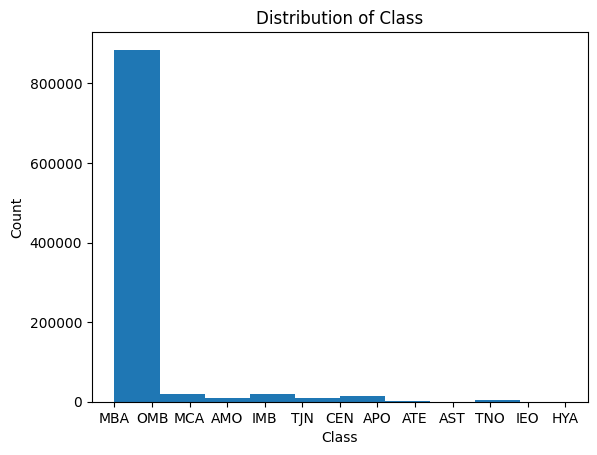

In [19]:
plt.hist(df['class'].astype(str))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title("Distribution of Class")
plt.show()

In [20]:
df.id.nunique()    # All are unique / Different values.

958524

In [21]:
df.spkid.nunique()   # All are unique / Different values.

958524

In [22]:
df.full_name.nunique()   # All are unique / Different values.

958524

In [23]:
df.pdes.nunique()      # All are unique / Different values.

958524

In [25]:
df.equinox.nunique()

1

In [26]:
df['equinox'].value_counts()

,count
equinox,
J2000,958524


 - The columns id, spkid, full_name, pdes, name and prefix are the columns with unique values. All values are different. They are not categorical values. No patterns can be identified from this. So its better to drop them

 - equinox column contain same value (J2000) for all rows . No petterns will be identified from this columns. So dropping equinox.

In [27]:
df.drop(columns=['id','spkid','full_name','pdes','name','prefix','equinox'],inplace=True)

In [28]:
# value counts of pha after deleting missing values

df.pha.value_counts()

,count
pha,
0.0,936537
1.0,2066


diameter, albedo, diameter_sigma these are the columns with 90 % having missing values. Better to drop these columns for better model performance

In [29]:
df.drop(columns=['diameter','albedo','diameter_sigma'],inplace=True)

Droping all left rows containing null values

In [30]:
df.dropna(inplace=True)

In [31]:
# number of rows and column in dataset after handling missing values

df.shape

(932335, 35)

In [32]:
# Null values

df.isna().sum().sort_values()

,0
neo,0
pha,0
H,0
orbit_id,0
epoch,0
epoch_mjd,0
epoch_cal,0
e,0
a,0
q,0


Null values are handled Successfully

In [33]:
df.dtypes

,0
neo,object
pha,float64
H,float64
orbit_id,object
epoch,float64
epoch_mjd,int64
epoch_cal,float64
e,float64
a,float64
q,float64


In [34]:
df.orbit_id.nunique()

525

orbit_id column contains 525 categories of values. <br>
Lets calculate the Number of orbit_id that have less than 10 occurances

In [35]:
orbit_count_occures_less_than_10 = (df['orbit_id'].value_counts() < 10).sum()
orbit_count_occures_less_than_10

np.int64(331)

Setting orbit_id as 'other' that have less than 10 occurances to reduce the number of categories

In [36]:
orbits = df['orbit_id'].value_counts().loc[lambda x: x<10].index.to_list()

In [37]:
df.loc[df['orbit_id'].isin(orbits), 'orbit_id'] = 'other'

In [38]:
df.orbit_id.value_counts().sort_values()

,count
orbit_id,
86,10
JPL 56,10
JPL 117,10
JPL 81,10
103,10
...,...
12,29136
JPL 3,29905
JPL 2,34563


Top 10 classes

In [39]:
top_10_class=df['class'].value_counts().head(10)

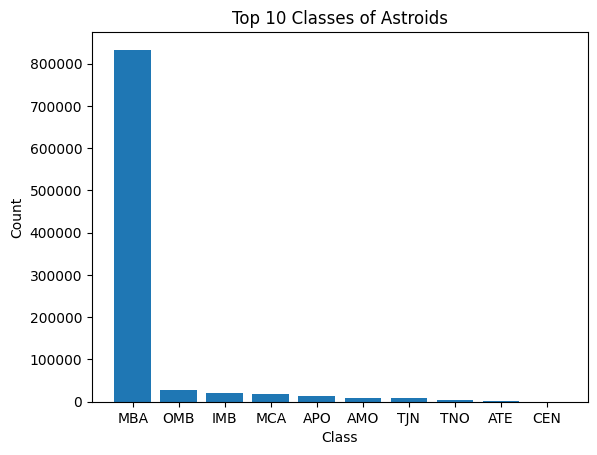

In [40]:
plt.bar(x=top_10_class.index,height=top_10_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title("Top 10 Classes of Astroids")
plt.show()

calculates the percentage of each 'neo' category within each 'pha' group in the DataFrame

In [41]:
pha_vs_neo=df.groupby('pha')['neo'].value_counts(normalize=True)*100
pha_vs_neo

pha  neo
0.0  N       97.76226
     Y        2.23774
1.0  Y      100.00000
Name: proportion, dtype: float64

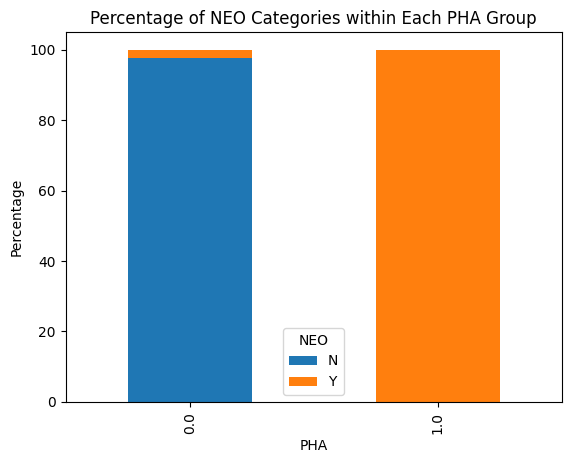

In [42]:
pha_vs_neo_df = pha_vs_neo.unstack()

pha_vs_neo_df.plot(kind='bar', stacked=True)

plt.xlabel('PHA')
plt.ylabel('Percentage')
plt.title('Percentage of NEO Categories within Each PHA Group')
plt.legend(title='NEO')
plt.show()

- Non-Hazardous Asteroids (PHA 0.0): The majority (97.76%) of non-hazardous asteroids are not near-Earth objects, indicating that they generally pose little to no threat to Earth. Only a small fraction (2.24%) of these non-hazardous asteroids are near-Earth objects.

- Potentially Hazardous Asteroids (PHA 1.0): All potentially hazardous asteroids are classified as near-Earth objects, suggesting that proximity to Earth is a key factor in their hazardous classification. This highlights the importance of monitoring near-Earth objects for potential threats.

encoding the neo, class and orbit_id columns using Label Encoding

In [43]:
df1 = pd.get_dummies(df, columns=['neo', 'class', 'orbit_id'])
df1.head()

,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,...,orbit_id_JPL 86,orbit_id_JPL 87,orbit_id_JPL 9,orbit_id_JPL 91,orbit_id_JPL 94,orbit_id_JPL 96,orbit_id_JPL 97,orbit_id_JPL 98,orbit_id_JPL 99,orbit_id_other
0,0.0,3.40,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,80.305531,...,False,False,False,False,False,False,False,False,False,False
1,0.0,4.20,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,173.024741,...,False,False,False,False,False,False,False,False,False,False
2,0.0,5.33,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,169.851482,...,False,False,False,False,False,False,False,False,False,True
3,0.0,3.00,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,103.810804,...,False,False,False,False,False,False,False,False,False,False
4,0.0,6.90,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,141.571026,...,False,False,False,False,False,False,False,False,False,True


In [44]:
df1.replace([True,False],[1,0],inplace=True)

<ipython-input-44-59b8c871b33d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace([True,False],[1,0],inplace=True)


In [46]:
df1.head()

,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,...,orbit_id_JPL 86,orbit_id_JPL 87,orbit_id_JPL 9,orbit_id_JPL 91,orbit_id_JPL 94,orbit_id_JPL 96,orbit_id_JPL 97,orbit_id_JPL 98,orbit_id_JPL 99,orbit_id_other
0,0.0,3.40,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,80.305531,...,0,0,0,0,0,0,0,0,0,0
1,0.0,4.20,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,173.024741,...,0,0,0,0,0,0,0,0,0,0
2,0.0,5.33,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,169.851482,...,0,0,0,0,0,0,0,0,0,1
3,0.0,3.00,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,103.810804,...,0,0,0,0,0,0,0,0,0,0
4,0.0,6.90,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,141.571026,...,0,0,0,0,0,0,0,0,0,1


In [47]:
df1.dtypes

,0
pha,float64
H,float64
epoch,float64
epoch_mjd,int64
epoch_cal,float64
...,...
orbit_id_JPL 96,int64
orbit_id_JPL 97,int64
orbit_id_JPL 98,int64
orbit_id_JPL 99,int64


Scaling using MinMax Scaler. Its important to preserve the relationship between the feature so that MinMax scaler is prefered

In [48]:
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
df1.head()


,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,...,orbit_id_JPL 86,orbit_id_JPL 87,orbit_id_JPL 9,orbit_id_JPL 91,orbit_id_JPL 94,orbit_id_JPL 96,orbit_id_JPL 97,orbit_id_JPL 98,orbit_id_JPL 99,orbit_id_other
0,0.0,0.131195,0.988218,0.988218,0.989134,0.076017,0.000066,0.030975,0.060467,0.223071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.154519,1.000000,1.000000,1.000000,0.230004,0.000066,0.025712,0.198916,0.480625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.187464,1.000000,1.000000,1.000000,0.256972,0.000063,0.023805,0.074158,0.471810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.119534,0.988218,0.988218,0.989134,0.088732,0.000054,0.025911,0.040748,0.288363,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.233236,1.000000,1.000000,1.000000,0.190939,0.000060,0.025049,0.030614,0.393253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Saving the dataset after Scaling

In [50]:
df1.to_csv('/content/scaled.csv', index=False)

In [3]:
df1=pd.read_csv('/content/scaled.csv')

In [4]:
df1.head()

,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,...,orbit_id_JPL 86,orbit_id_JPL 87,orbit_id_JPL 9,orbit_id_JPL 91,orbit_id_JPL 94,orbit_id_JPL 96,orbit_id_JPL 97,orbit_id_JPL 98,orbit_id_JPL 99,orbit_id_other
0,0.0,0.131195,0.988218,0.988218,0.989134,0.076017,0.000066,0.030975,0.060467,0.223071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.154519,1.000000,1.000000,1.000000,0.230004,0.000066,0.025712,0.198916,0.480625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.187464,1.000000,1.000000,1.000000,0.256972,0.000063,0.023805,0.074158,0.471810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.119534,0.988218,0.988218,0.989134,0.088732,0.000054,0.025911,0.040748,0.288363,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.233236,1.000000,1.000000,1.000000,0.190939,0.000060,0.025049,0.030614,0.393253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


features (x) and the target variable (y).

In [5]:
x=df1.drop(columns=['pha'])
y=df1['pha']

Splitting the dataset into training and testing

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
y_train.value_counts()  # training-set value counts

,count
pha,
0.0,744189
1.0,1679


In [8]:
y_test.value_counts()  # testing-set value counts

,count
pha,
0.0,186080
1.0,387


## **Model Training using different algorithms<br>**
- Algorithms used:
    - Gradient boosting Classifier
    - Random Forest Classifier
    - XGBoost Classifier

Only Enseble model algorithms are used because the dataset is highly imbalanced. Ensemple models can perform their best also when data is highly imbalanced

### **Gradient Boosting Classifier**

In [9]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train, y_train)

GradientBoostingClassifier()

In [10]:
y_pred_gb = gb_classifier.predict(x_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", accuracy_gb)

print("\n\n")

print("Classification Report :\n",classification_report(y_test, y_pred_gb))

print("\n\n")

print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_gb))

Accuracy: 0.998096177875978



Classification Report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    186080
         1.0       0.82      0.11      0.19       387

    accuracy                           1.00    186467
   macro avg       0.91      0.55      0.59    186467
weighted avg       1.00      1.00      1.00    186467




Confusion Matrix:
 [[186071      9]
 [   346     41]]


### **Random Forest Classifier**

In [11]:
rf_classifier = RandomForestClassifier()

In [12]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [13]:
y_pred_rf = rf_classifier.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

print("\n\n")

print("Classification Report:\n",classification_report(y_test, y_pred_rf))

print("\n\n")

print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9998444765025447



Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    186080
         1.0       0.98      0.94      0.96       387

    accuracy                           1.00    186467
   macro avg       0.99      0.97      0.98    186467
weighted avg       1.00      1.00      1.00    186467




Confusion Matrix :
 [[186074      6]
 [    23    364]]


### **XGBoost Classifier**

In [14]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
y_pred_xgb = xgb_classifier.predict(x_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)

print("\n\n")

print("Classification Report:\n",classification_report(y_test, y_pred_xgb))

print("\n\n")

print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.9996621386089763



Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    186080
         1.0       0.95      0.89      0.92       387

    accuracy                           1.00    186467
   macro avg       0.97      0.94      0.96    186467
weighted avg       1.00      1.00      1.00    186467




Confusion Matrix:
 [[186061     19]
 [    44    343]]


## **Model Performance Comparison**

In [16]:
models = ['Gradient Boosting', 'Random Forest', 'XGBoost']

accuracy_scores = [accuracy_gb, accuracy_rf, accuracy_xgb]

precision_scores = [precision_score(y_test, y_pred_gb),
                     precision_score(y_test, y_pred_rf),
                     precision_score(y_test, y_pred_xgb)]

recall_scores = [recall_score(y_test, y_pred_gb),
                  recall_score(y_test, y_pred_rf),
                  recall_score(y_test, y_pred_xgb)]

f1_scores = [f1_score(y_test, y_pred_gb),
             f1_score(y_test, y_pred_rf),
             f1_score(y_test, y_pred_xgb)]

In [17]:
df_metrics = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

In [18]:
df_metrics

,Model,Accuracy,Precision,Recall,F1-Score
0,Gradient Boosting,0.998096,0.820000,0.105943,0.187643
1,Random Forest,0.999844,0.983784,0.940568,0.961691
2,XGBoost,0.999662,0.947514,0.886305,0.915888


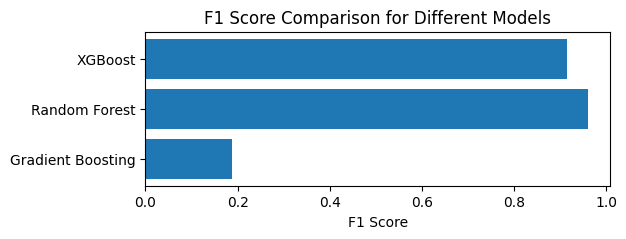

In [20]:
plt.figure(figsize=(6, 2))
plt.barh(df_metrics['Model'], df_metrics['F1-Score'])
plt.xlabel('F1 Score')
plt.title('F1 Score Comparison for Different Models')
plt.show()


**From the above plot it s clearly visible that Random Forest is the winner for this Prediction. Radom Forest giving the best Precision and Recall and F1 Score than other Models**